# Md Abrar Jahin

## Data Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install emoji
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=dabb5432023ee9796538b3c0452f92cea92b3f0addf0f378e2d594e848014ffa
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [3]:
df_one = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Global.csv')

print(df_one.info()) #29934
# print(df_two.info()) #24702
# print(df_three.info()) #22742

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411885 entries, 0 to 411884
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_at   411885 non-null  object
 1   near         411885 non-null  object
 2   clean_tweet  409915 non-null  object
dtypes: object(3)
memory usage: 9.4+ MB
None


In [4]:
#merge all the datasets
#all_df=[df_one]
#all_df=pd.concat(all_df)
all_df=df_one
all_df = all_df.reset_index(drop=True)
print(len(all_df))
empty_tweet=all_df['clean_tweet'].isna().value_counts()
print(empty_tweet) #no empty tweets

411885
False    409915
True       1970
Name: clean_tweet, dtype: int64


In [5]:
all_df = all_df.dropna()
all_df

,created_at,near,clean_tweet
0,20-08-20,India,year old ex vice presid moodi awori land inter...
1,20-08-20,India,break depart health report peopl caught covid1...
2,20-08-20,India,help fan request help arrang bed posit father ...
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo appreci kingdom ma...
...,...,...,...
411880,20-06-20,Newzealand,congratul studi one year master degre
411881,20-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
411882,20-06-20,Newzealand,anoth meat process outbreak time
411883,20-06-20,Newzealand,knew covid19 would spread trump prais els rall...


In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
#Handling repeated characters
#reference: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
#https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python
from nltk.corpus import wordnet
#re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

love


In [8]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [9]:
#replace words contraction
#reference:https://github.com/kiran-bal/Disaster_tweets_classifier/blob/2e6d648f5ef9cbe67024ad5cf032582fc4dc3a75/version2/notebooks/Disaster_tweet_classifier.ipynb
#re.sub(pattern, repl, string, count=0, flags=0): count=0: all matched will be replaced
contraction_dict=[(r'I\'m', 'I am'),(r'i\'m', 'i am'),(r'ain\'t', 'am not'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)n\'t', '\g<1> not'),
                  (r'can\'t', 'cannot'),(r'won\'t', 'will not'), (r'wont', 'will not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)\'d', '\g<1> would'), (r'(\w+)\'ve', '\g<1> have'),
                 (r'I\’m', 'I am'),(r'i\’m', 'i am'),(r'ain\’t', 'am not'),(r'(\w+)\’s', '\g<1> is'),(r'(\w+)\’re', '\g<1> are'),(r'(\w+)n\’t', '\g<1> not'),
                  (r'can\’t', 'cannot'),(r'won\’t', 'will not'), (r'(\w+)\’ll', '\g<1> will'), (r'(\w+)\’d', '\g<1> would'), (r'(\w+)\’ve', '\g<1> have')]
#Notice: The quotation of some texts are not in English
def handle_contraction(text):
    patterns_set=[(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text=re.sub(pattern, repl, text)
    return text
#test
print(all_df['clean_tweet'][4])
print(handle_contraction(all_df['clean_tweet'][4]))

curiou case unit nation ngo appreci kingdom mamata banerje covid19 work
curiou case unit nation ngo appreci kingdom mamata banerje covid19 work


In [10]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
all_df=preprocessing_two(all_df)
all_df

,created_at,near,clean_tweet
0,20-08-20,India,year old ex vice presid modi awori land inter ...
1,20-08-20,India,break depart health report peopl caught covid1...
2,20-08-20,India,help fan request help arang bed posit father v...
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo apreci kingdom mam...
...,...,...,...
411880,20-06-20,Newzealand,congratul studi one year master degre
411881,20-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
411882,20-06-20,Newzealand,anoth meat process outbreak time
411883,20-06-20,Newzealand,knew covid19 would spread trump prais els rali...


In [11]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet']=df['clean_tweet'].replace('[^a-zA-Z]',' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace('\s+', ' ', regex=True)
    return df
all_df=replace_non_alphabetical(all_df)
all_df

,created_at,near,clean_tweet
0,20-08-20,India,year old ex vice presid modi awori land inter ...
1,20-08-20,India,break depart health report peopl caught covid ...
2,20-08-20,India,help fan request help arang bed posit father v...
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo apreci kingdom mam...
...,...,...,...
411880,20-06-20,Newzealand,congratul studi one year master degre
411881,20-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
411882,20-06-20,Newzealand,anoth meat process outbreak time
411883,20-06-20,Newzealand,knew covid would spread trump prais els rali t...


In [12]:
#remove less than two-character words, but keep "no" if len(w)>2 or w=="no"
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
all_df=short_words(all_df)
all_df.head()

,created_at,near,clean_tweet
0,20-08-20,India,year old vice presid modi awori land inter cou...
1,20-08-20,India,break depart health report peopl caught covid ...
2,20-08-20,India,help fan request help arang bed posit father v...
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo apreci kingdom mam...


In [13]:
#create own stopwords
my_stopwords = ['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he's", 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'normally', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', "t's", 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that's", 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", "we'll", "we're", "we've", 'welcome', 'well', 'went', 'were', "weren't", 'what', "what's", 'whatever', 'when', 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', "won't", 'wonder', 'would', 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', '']
print(my_stopwords)

def remove_stopwords(df):
    df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in my_stopwords]))
    return df
all_df=remove_stopwords(all_df)
all_df
# all_df.to_csv('clean_datasets/all_clean_1_test.csv',index = False, encoding='utf_8_sig')

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

,created_at,near,clean_tweet
0,20-08-20,India,year vice presid modi awori land inter counti ...
1,20-08-20,India,break depart health report peopl caught covid ...
2,20-08-20,India,fan request arang bed posit father view tweet
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo apreci kingdom mam...
...,...,...,...
411880,20-06-20,Newzealand,congratul studi year master degre
411881,20-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
411882,20-06-20,Newzealand,anoth meat process outbreak time
411883,20-06-20,Newzealand,knew covid spread trump prais els rali today s...


In [14]:
#remove empty tweets
def remove_empty(df):
    df=df[df['clean_tweet']!='']
    return df
all_df=remove_empty(all_df)
all_df=all_df.reset_index(drop=True)
all_df

,created_at,near,clean_tweet
0,20-08-20,India,year vice presid modi awori land inter counti ...
1,20-08-20,India,break depart health report peopl caught covid ...
2,20-08-20,India,fan request arang bed posit father view tweet
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo apreci kingdom mam...
...,...,...,...
409390,20-06-20,Newzealand,congratul studi year master degre
409391,20-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
409392,20-06-20,Newzealand,anoth meat process outbreak time
409393,20-06-20,Newzealand,knew covid spread trump prais els rali today s...


In [15]:
#clean_df = pd.read_csv('/kaggle/input/uk-twitter-covid19-dataset/all_clean_1.csv')
clean_df=all_df
clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '')

<ipython-input-15-ad7125c8d310>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '')


In [16]:
clean_df

,created_at,near,clean_tweet
0,20-08-20,India,year vice presid modi awori land inter counti ...
1,20-08-20,India,break depart health report peopl caught covid ...
2,20-08-20,India,fan request arang bed posit father view tweet
3,20-08-20,India,lend club loan origin hey bank
4,20-08-20,India,curiou case unit nation ngo apreci kingdom mam...
...,...,...,...
409390,20-06-20,Newzealand,congratul studi year master degre
409391,20-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
409392,20-06-20,Newzealand,anoth meat process outbreak time
409393,20-06-20,Newzealand,knew covid spread trump prais els rali today s...


In [17]:
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'] , utc=True).dt.date
#clean_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_df

,created_at,near,clean_tweet
0,2020-08-20,India,year vice presid modi awori land inter counti ...
1,2020-08-20,India,break depart health report peopl caught covid ...
2,2020-08-20,India,fan request arang bed posit father view tweet
3,2020-08-20,India,lend club loan origin hey bank
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...
...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...
409392,2020-06-20,Newzealand,anoth meat process outbreak time
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...


In [18]:
clean_all = clean_df

In [19]:
#The number of tweets collected in each city
cities = ['India','Pakistan','Australia','Ireland','Newzealand','Germany',
          'Canada','London','China','Norway','Belgium','Kenya','Nigeria','Malaysia','Scotland','Nepal',
          'United States','Japan','South Korea','United Kingdom','Southampton','Malawi','Cameroon','Fiji',
          'Bermuda','Uganda','Montserrat','Jamaica','Zambia','Rwanda','Bahamas','Malta']

lengths = []
for i in cities:
  London_df = clean_all[clean_all['near'].str.contains(i)]
  London_df = London_df.reset_index(drop=True)
  lengths.append(len(London_df))
  print("Total tweets in {}:".format(i),len(London_df))


Total tweets in India: 6874
Total tweets in Pakistan: 204
Total tweets in Australia: 48596
Total tweets in Ireland: 1305
Total tweets in Newzealand: 22117
Total tweets in Germany: 350
Total tweets in Canada: 1653
Total tweets in London: 2374
Total tweets in China: 91
Total tweets in Norway: 288
Total tweets in Belgium: 138
Total tweets in Kenya: 13
Total tweets in Nigeria: 528
Total tweets in Malaysia: 24
Total tweets in Scotland: 17
Total tweets in Nepal: 247
Total tweets in United States: 206046
Total tweets in Japan: 380
Total tweets in South Korea: 1676
Total tweets in United Kingdom: 104760
Total tweets in Southampton: 1
Total tweets in Malawi: 1228
Total tweets in Cameroon: 804
Total tweets in Fiji: 101
Total tweets in Bermuda: 373
Total tweets in Uganda: 1492
Total tweets in Montserrat: 1512
Total tweets in Jamaica: 1252
Total tweets in Zambia: 1011
Total tweets in Rwanda: 2002
Total tweets in Bahamas: 592
Total tweets in Malta: 1346


In [20]:
cities = {"city": cities, "total number": lengths}
city_frame  = pd.DataFrame(data = cities)
city_frame

,city,total number
0,India,6874
1,Pakistan,204
2,Australia,48596
3,Ireland,1305
4,Newzealand,22117
5,Germany,350
6,Canada,1653
7,London,2374
8,China,91
9,Norway,288


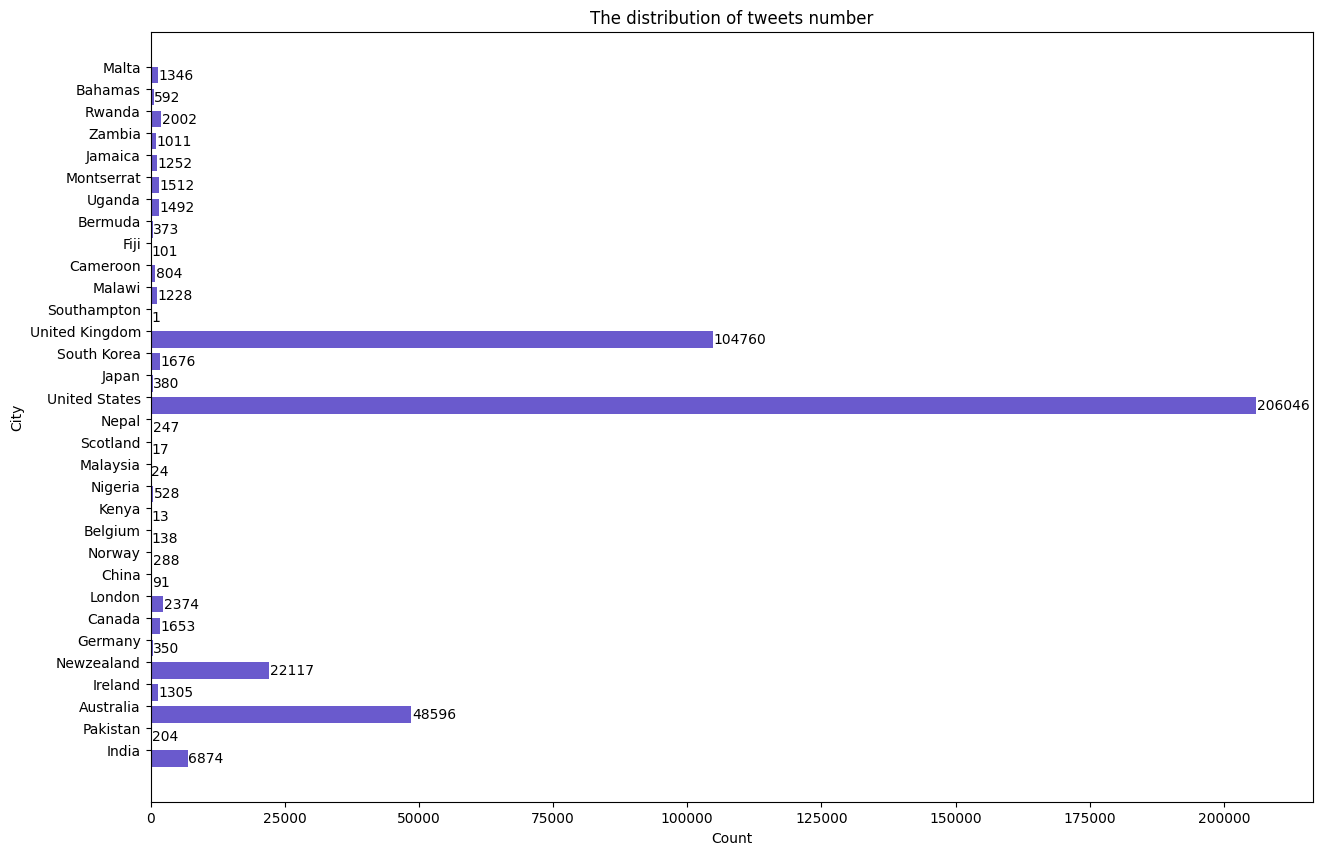

In [21]:
#reference: https://stackoverflow.com/questions/60212294/how-to-add-labels-to-a-horizontal-bar-chart-in-matplotlib
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()   

width = 0.75 # bar's width 
x_loc = np.arange(len(city_frame['total number']))  # the x locations
ax.barh(x_loc, city_frame['total number'], width, color="slateblue")
ax.set_yticks(x_loc+width/2)
ax.set_yticklabels(city_frame['city'], minor=False)

_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
for i, v in enumerate(city_frame['total number']):
    ax.text(v + 100, i, str(v), color='black', fontsize=10, ha='left', va='center')
    
plt.title('The distribution of tweets number')
plt.xlabel('Count')
plt.ylabel('City')

# plt.show()
plt.savefig("tweets_distribution_global.png")

## Further Cleaning and lexicon-based method

In [22]:
import pandas as pd
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [23]:
df=clean_all
#df=pd.read_csv('/kaggle/input/uk-twitter-covid19-dataset/clean_all.csv')
df.head()
len(df)

409395

In [24]:
#tokenization
def tweet_token(text):
    words_set=text.str.split()
    tokens=[word for word in words_set]
    return tokens

df['tokens']=tweet_token(df['clean_tweet'])
df.head()

,created_at,near,clean_tweet,tokens
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,..."
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,..."
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view..."
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]"
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king..."


In [25]:
#lemmatize and stemming
import nltk
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
word_lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [word_lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(text)]
df['lemma']=df['clean_tweet'].apply(lemmatize_text)
df.head()

,created_at,near,clean_tweet,tokens,lemma
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,..."
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,..."
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view..."
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]"
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king..."


In [26]:
#lemma_sentence
df['lemma_sentence'] = df['lemma'].apply(lambda x: ' '.join(x))
df.head()

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...


In [27]:
#POS for clean tweets
#reference:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
#https://stackoverflow.com/questions/51267166/lemmatization-pandas-python
nltk.download('punkt')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
stem_lemmatizer = WordNetLemmatizer()

def convert_wordnet_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def pos_tag_set(tweet):
    tagged_words = nltk.pos_tag(nltk.word_tokenize(tweet))
    new_tag=[]
    for word, tag in tagged_words:
        new_tag.append(tuple([word, convert_wordnet_tag(tag)]))
    return new_tag
df['pos_tag']=df['clean_tweet'].apply(pos_tag_set)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...,"[(year, n), (vice, n), (presid, n), (modi, n),..."
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...,"[(break, a), (depart, a), (health, n), (report..."
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet,"[(fan, n), (request, n), (arang, n), (bed, v),..."
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank,"[(lend, n), (club, n), (loan, n), (origin, Non..."
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...,"[(curiou, a), (case, n), (unit, n), (nation, n..."
...,...,...,...,...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre,"[congratul, studi, year, master, degre]","[congratul, studi, year, master, degre]",congratul studi year master degre,"[(congratul, n), (studi, a), (year, n), (maste..."
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...,"[apolog, fear, anxieti, caus, claim, surviv, r...","[apolog, fear, anxieti, caus, claim, surviv, r...",apolog fear anxieti caus claim surviv rate acq...,"[(apolog, n), (fear, n), (anxieti, None), (cau..."
409392,2020-06-20,Newzealand,anoth meat process outbreak time,"[anoth, meat, process, outbreak, time]","[anoth, meat, process, outbreak, time]",anoth meat process outbreak time,"[(anoth, None), (meat, n), (process, n), (outb..."
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...,"[knew, covid, spread, trump, prais, els, rali,...","[knew, covid, spread, trump, prais, el, rali, ...",knew covid spread trump prais el rali today su...,"[(knew, n), (covid, n), (spread, v), (trump, a..."


In [28]:
#create lemma sentence with pos-tags
def handle_lemma(pos_tweet):
    lemma_set = " "
    for word, pos in pos_tweet:
        if not pos: 
            lemma = word
            lemma_set = lemma_set + " " + lemma
        else:  
            lemma = stem_lemmatizer.lemmatize(word, pos=pos)
            lemma_set = lemma_set + " " + lemma
    return lemma_set
df['pos_tag'].apply(handle_lemma)
    
df['lemma_sentence(with POS)'] = df['pos_tag'].apply(handle_lemma)
df

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS)
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...,"[(year, n), (vice, n), (presid, n), (modi, n),...",year vice presid modi awori land inter count...
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...,"[(break, a), (depart, a), (health, n), (report...",break depart health report peopl catch covid...
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet,"[(fan, n), (request, n), (arang, n), (bed, v),...",fan request arang bed posit father view tweet
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank,"[(lend, n), (club, n), (loan, n), (origin, Non...",lend club loan origin hey bank
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...,"[(curiou, a), (case, n), (unit, n), (nation, n...",curiou case unit nation ngo apreci kingdom m...
...,...,...,...,...,...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre,"[congratul, studi, year, master, degre]","[congratul, studi, year, master, degre]",congratul studi year master degre,"[(congratul, n), (studi, a), (year, n), (maste...",congratul studi year master degre
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...,"[apolog, fear, anxieti, caus, claim, surviv, r...","[apolog, fear, anxieti, caus, claim, surviv, r...",apolog fear anxieti caus claim surviv rate acq...,"[(apolog, n), (fear, n), (anxieti, None), (cau...",apolog fear anxieti caus claim surviv rate a...
409392,2020-06-20,Newzealand,anoth meat process outbreak time,"[anoth, meat, process, outbreak, time]","[anoth, meat, process, outbreak, time]",anoth meat process outbreak time,"[(anoth, None), (meat, n), (process, n), (outb...",anoth meat process outbreak time
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...,"[knew, covid, spread, trump, prais, els, rali,...","[knew, covid, spread, trump, prais, el, rali, ...",knew covid spread trump prais el rali today su...,"[(knew, n), (covid, n), (spread, v), (trump, a...",knew covid spread trump prais el rali today ...


In [29]:
#save as csv
from google.colab import files
#df.to_csv('further_clean_global.csv',index = False, encoding='utf_8_sig')
#files.download('further_clean_global.csv')

In [30]:
further_clean_all = df

In [31]:
#sentiwordnet analysis
#reference: https://github.com/harika-bonthu/Lexicon-based-SentimentAnalysis/blob/main/lexicon_based_sentiment_analysis.ipynb
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#和之前的方法结果 有差距

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        synset = synsets[0] #only take the most common meaning
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    if not tokens_count:
        return 0
    else:
        return sentiment

df['sentiword_analysis']=df['pos_tag'].apply(sentiwordnetanalysis)
df

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...,"[(year, n), (vice, n), (presid, n), (modi, n),...",year vice presid modi awori land inter count...,0.250
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...,"[(break, a), (depart, a), (health, n), (report...",break depart health report peopl catch covid...,0.625
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet,"[(fan, n), (request, n), (arang, n), (bed, v),...",fan request arang bed posit father view tweet,0.000
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank,"[(lend, n), (club, n), (loan, n), (origin, Non...",lend club loan origin hey bank,0.000
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...,"[(curiou, a), (case, n), (unit, n), (nation, n...",curiou case unit nation ngo apreci kingdom m...,0.000
...,...,...,...,...,...,...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre,"[congratul, studi, year, master, degre]","[congratul, studi, year, master, degre]",congratul studi year master degre,"[(congratul, n), (studi, a), (year, n), (maste...",congratul studi year master degre,0.625
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...,"[apolog, fear, anxieti, caus, claim, surviv, r...","[apolog, fear, anxieti, caus, claim, surviv, r...",apolog fear anxieti caus claim surviv rate acq...,"[(apolog, n), (fear, n), (anxieti, None), (cau...",apolog fear anxieti caus claim surviv rate a...,-0.625
409392,2020-06-20,Newzealand,anoth meat process outbreak time,"[anoth, meat, process, outbreak, time]","[anoth, meat, process, outbreak, time]",anoth meat process outbreak time,"[(anoth, None), (meat, n), (process, n), (outb...",anoth meat process outbreak time,-0.125
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...,"[knew, covid, spread, trump, prais, els, rali,...","[knew, covid, spread, trump, prais, el, rali, ...",knew covid spread trump prais el rali today su...,"[(knew, n), (covid, n), (spread, v), (trump, a...",knew covid spread trump prais el rali today ...,0.125


In [32]:
#VADER--low speed--use further clean datasets
sentiment_analyzer = SentimentIntensityAnalyzer()
def vaderSentiment_method(df):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    snt_score = sentiment_analyzer.polarity_scores(df['lemma_sentence(with POS)'])
    return snt_score['compound'] 

df['vader_score'] = df.apply(vaderSentiment_method, axis=1)
df

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...,"[(year, n), (vice, n), (presid, n), (modi, n),...",year vice presid modi awori land inter count...,0.250,0.0000
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...,"[(break, a), (depart, a), (health, n), (report...",break depart health report peopl catch covid...,0.625,0.0000
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet,"[(fan, n), (request, n), (arang, n), (bed, v),...",fan request arang bed posit father view tweet,0.000,0.3182
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank,"[(lend, n), (club, n), (loan, n), (origin, Non...",lend club loan origin hey bank,0.000,0.0000
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...,"[(curiou, a), (case, n), (unit, n), (nation, n...",curiou case unit nation ngo apreci kingdom m...,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre,"[congratul, studi, year, master, degre]","[congratul, studi, year, master, degre]",congratul studi year master degre,"[(congratul, n), (studi, a), (year, n), (maste...",congratul studi year master degre,0.625,0.0000
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...,"[apolog, fear, anxieti, caus, claim, surviv, r...","[apolog, fear, anxieti, caus, claim, surviv, r...",apolog fear anxieti caus claim surviv rate acq...,"[(apolog, n), (fear, n), (anxieti, None), (cau...",apolog fear anxieti caus claim surviv rate a...,-0.625,-0.4939
409392,2020-06-20,Newzealand,anoth meat process outbreak time,"[anoth, meat, process, outbreak, time]","[anoth, meat, process, outbreak, time]",anoth meat process outbreak time,"[(anoth, None), (meat, n), (process, n), (outb...",anoth meat process outbreak time,-0.125,0.0000
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...,"[knew, covid, spread, trump, prais, els, rali,...","[knew, covid, spread, trump, prais, el, rali, ...",knew covid spread trump prais el rali today su...,"[(knew, n), (covid, n), (spread, v), (trump, a...",knew covid spread trump prais el rali today ...,0.125,0.5994


In [33]:
#Textblob
from textblob import TextBlob

def Polarity_score(tweet):
    return TextBlob(tweet).sentiment.polarity

def Subjectivity_score(tweet):
    return TextBlob(tweet).sentiment.subjectivity

df['textblob_polarity'] = df['lemma_sentence(with POS)'].apply(Polarity_score) 
df

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...,"[(year, n), (vice, n), (presid, n), (modi, n),...",year vice presid modi awori land inter count...,0.250,0.0000,0.000000
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...,"[(break, a), (depart, a), (health, n), (report...",break depart health report peopl catch covid...,0.625,0.0000,0.000000
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet,"[(fan, n), (request, n), (arang, n), (bed, v),...",fan request arang bed posit father view tweet,0.000,0.3182,0.000000
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank,"[(lend, n), (club, n), (loan, n), (origin, Non...",lend club loan origin hey bank,0.000,0.0000,0.000000
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...,"[(curiou, a), (case, n), (unit, n), (nation, n...",curiou case unit nation ngo apreci kingdom m...,0.000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre,"[congratul, studi, year, master, degre]","[congratul, studi, year, master, degre]",congratul studi year master degre,"[(congratul, n), (studi, a), (year, n), (maste...",congratul studi year master degre,0.625,0.0000,0.000000
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...,"[apolog, fear, anxieti, caus, claim, surviv, r...","[apolog, fear, anxieti, caus, claim, surviv, r...",apolog fear anxieti caus claim surviv rate acq...,"[(apolog, n), (fear, n), (anxieti, None), (cau...",apolog fear anxieti caus claim surviv rate a...,-0.625,-0.4939,0.000000
409392,2020-06-20,Newzealand,anoth meat process outbreak time,"[anoth, meat, process, outbreak, time]","[anoth, meat, process, outbreak, time]",anoth meat process outbreak time,"[(anoth, None), (meat, n), (process, n), (outb...",anoth meat process outbreak time,-0.125,0.0000,0.000000
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...,"[knew, covid, spread, trump, prais, els, rali,...","[knew, covid, spread, trump, prais, el, rali, ...",knew covid spread trump prais el rali today su...,"[(knew, n), (covid, n), (spread, v), (trump, a...",knew covid spread trump prais el rali today ...,0.125,0.5994,0.333333


In [34]:
##save as csv
#df.to_csv('unsupervised_lexicon_global.csv',index = False, encoding='utf_8_sig')

## Initial data analysis

In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

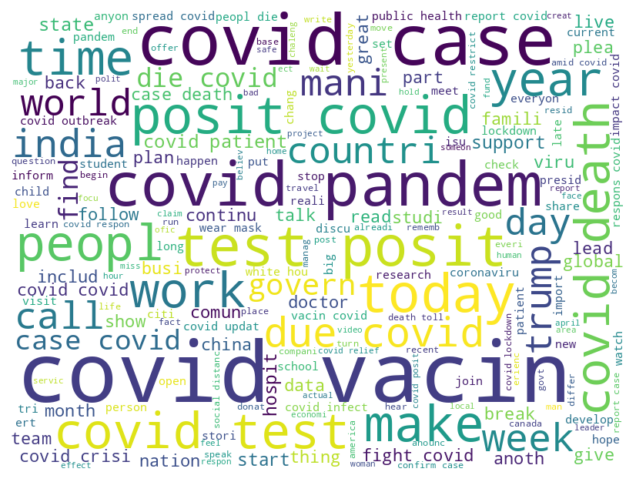

<Figure size 1500x1000 with 0 Axes>

In [36]:
#word cloud map
#https://www.datacamp.com/community/tutorials/wordcloud-python
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
word_set = ' '.join([tweet_word for tweet_word in df['lemma_sentence(with POS)']])
word_cloud(word_set)
plt.savefig('word_cloud_global.jpg')
#vaccine is a hot topic

In [37]:
#Word frequency
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import Counter
texts = df['lemma_sentence(with POS)']
word_counts = Counter(word_tokenize('\n'.join(texts)))
word_top=word_counts.most_common(n=20)
print(word_top)
# count_sum=

[('covid', 226463), ('vacin', 36234), ('case', 32265), ('test', 25215), ('peopl', 24103), ('death', 20131), ('pandem', 17933), ('health', 16151), ('report', 15601), ('day', 14205), ('posit', 13725), ('today', 13249), ('trump', 13198), ('state', 12099), ('time', 11739), ('coronaviru', 11157), ('make', 10755), ('work', 10301), ('govern', 10025), ('hospit', 9780)]


22088961


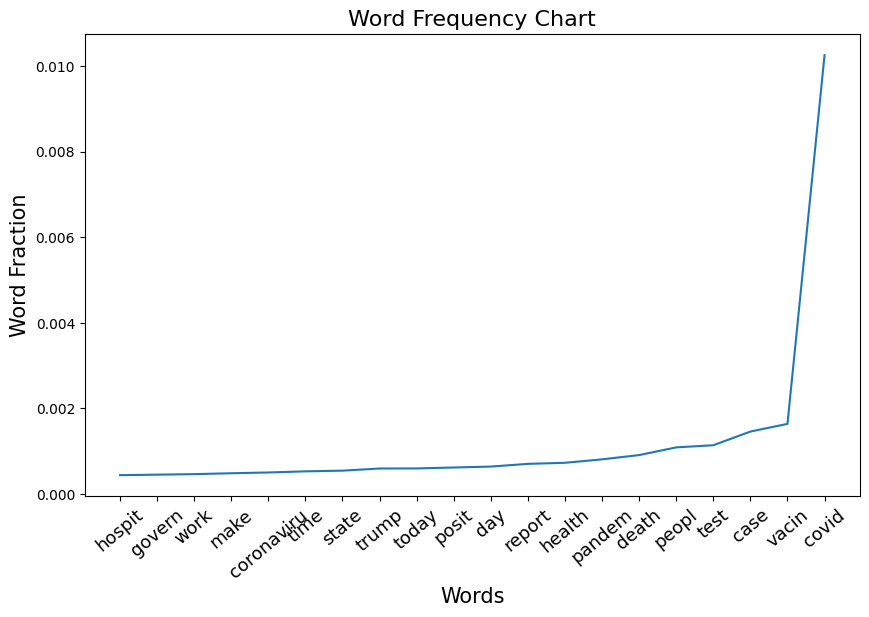

In [38]:
#(5)
count_all = df['lemma_sentence(with POS)'].str.len().sum()
print(count_all)

words=[count[0] for count in word_top]
frac_value=[int(count[1])/count_all for count in  word_top]
words=words[: :-1]
frac_value=sorted(frac_value)

#plot line chart
plt.figure(figsize=(10, 6))
plt.plot(words,frac_value)
plt.xticks(rotation=40, fontsize=13)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Word Fraction',fontsize=15)
plt.title('Word Frequency Chart',fontsize=16)
plt.savefig('word_freq_global.png')

## Data analysis for lexicon-based methods

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
dfs=df
print(len(dfs))

409395


In [41]:
#sentiment for step1
#for textblob and sentiword
def senti_label(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [42]:
#for VADER
def senti_label_2(score):
    if score <= -0.05:
        return -1
    elif score >= 0.05:
        return 1
    else:
        return 0

In [43]:
dfs['senti_textblob'] = dfs['textblob_polarity'].apply(senti_label)
dfs['senti_wordnet'] = dfs['sentiword_analysis'].apply(senti_label)
dfs
#counting
blob_all=dfs.groupby('senti_textblob').count()
print("textblob_all:",blob_all["textblob_polarity"])

wordnet_all=dfs.groupby('senti_wordnet').count()
print("wordnet_all:",wordnet_all["sentiword_analysis"])

#using senti_label_2
dfs['senti_vader'] = dfs['vader_score'].apply(senti_label_2)
vader_all=dfs.groupby('senti_vader').count()
print('vader_all:',vader_all["vader_score"])

textblob_all: senti_textblob
-1     59647
 0    274368
 1     75380
Name: textblob_polarity, dtype: int64
wordnet_all: senti_wordnet
-1    105020
 0    173793
 1    130582
Name: sentiword_analysis, dtype: int64
vader_all: senti_vader
-1    113153
 0    197388
 1     98854
Name: vader_score, dtype: int64


In [44]:
vader_all=dfs.groupby('senti_vader').count()
print(vader_all["vader_score"])
wordnet_all=dfs.groupby('senti_wordnet').count()
print(wordnet_all["sentiword_analysis"])
blob_all=dfs.groupby('senti_textblob').count()
print(blob_all["textblob_polarity"])

senti_vader
-1    113153
 0    197388
 1     98854
Name: vader_score, dtype: int64
senti_wordnet
-1    105020
 0    173793
 1    130582
Name: sentiword_analysis, dtype: int64
senti_textblob
-1     59647
 0    274368
 1     75380
Name: textblob_polarity, dtype: int64


In [45]:
new_dfs = dfs

In [46]:
#extreme positive
slight_pos_wordnet = new_dfs[new_dfs['sentiword_analysis'].between(0.5,1)]
print("wordnet:",len(slight_pos_wordnet))
slight_pos_blob = new_dfs[new_dfs['textblob_polarity'].between(0.5,1)]
print("textbolb",len(slight_pos_blob))
slight_pos_vader = new_dfs[new_dfs['vader_score'].between(0.5,1)]
print("vader",len(slight_pos_vader))
#extreme negative 
slight_pos_wordnet = new_dfs[new_dfs['sentiword_analysis'].between(-1,-0.5)]
print("wordnet:",len(slight_pos_wordnet))
slight_pos_blob = new_dfs[new_dfs['textblob_polarity'].between(-1,-0.5)]
print("textblob",len(slight_pos_blob))
slight_pos_vader = new_dfs[new_dfs['vader_score'].between(-1,-0.5)]
print("vader",len(slight_pos_vader))

wordnet: 40733
textbolb 18076
vader 31385
wordnet: 35421
textblob 11578
vader 53574


# Supervised Approaches

In [47]:
import pandas as pd
import numpy as np
import gensim 
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings
warnings.filterwarnings("ignore")

In [48]:
df

,created_at,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity,senti_textblob,senti_wordnet,senti_vader
0,2020-08-20,India,year vice presid modi awori land inter counti ...,"[year, vice, presid, modi, awori, land, inter,...","[year, vice, presid, modi, awori, land, inter,...",year vice presid modi awori land inter counti ...,"[(year, n), (vice, n), (presid, n), (modi, n),...",year vice presid modi awori land inter count...,0.250,0.0000,0.000000,0,1,0
1,2020-08-20,India,break depart health report peopl caught covid ...,"[break, depart, health, report, peopl, caught,...","[break, depart, health, report, peopl, caught,...",break depart health report peopl caught covid ...,"[(break, a), (depart, a), (health, n), (report...",break depart health report peopl catch covid...,0.625,0.0000,0.000000,0,1,0
2,2020-08-20,India,fan request arang bed posit father view tweet,"[fan, request, arang, bed, posit, father, view...","[fan, request, arang, bed, posit, father, view...",fan request arang bed posit father view tweet,"[(fan, n), (request, n), (arang, n), (bed, v),...",fan request arang bed posit father view tweet,0.000,0.3182,0.000000,0,0,1
3,2020-08-20,India,lend club loan origin hey bank,"[lend, club, loan, origin, hey, bank]","[lend, club, loan, origin, hey, bank]",lend club loan origin hey bank,"[(lend, n), (club, n), (loan, n), (origin, Non...",lend club loan origin hey bank,0.000,0.0000,0.000000,0,0,0
4,2020-08-20,India,curiou case unit nation ngo apreci kingdom mam...,"[curiou, case, unit, nation, ngo, apreci, king...","[curiou, case, unit, nation, ngo, apreci, king...",curiou case unit nation ngo apreci kingdom mam...,"[(curiou, a), (case, n), (unit, n), (nation, n...",curiou case unit nation ngo apreci kingdom m...,0.000,0.0000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409390,2020-06-20,Newzealand,congratul studi year master degre,"[congratul, studi, year, master, degre]","[congratul, studi, year, master, degre]",congratul studi year master degre,"[(congratul, n), (studi, a), (year, n), (maste...",congratul studi year master degre,0.625,0.0000,0.000000,0,1,0
409391,2020-06-20,Newzealand,apolog fear anxieti caus claim surviv rate acq...,"[apolog, fear, anxieti, caus, claim, surviv, r...","[apolog, fear, anxieti, caus, claim, surviv, r...",apolog fear anxieti caus claim surviv rate acq...,"[(apolog, n), (fear, n), (anxieti, None), (cau...",apolog fear anxieti caus claim surviv rate a...,-0.625,-0.4939,0.000000,0,-1,-1
409392,2020-06-20,Newzealand,anoth meat process outbreak time,"[anoth, meat, process, outbreak, time]","[anoth, meat, process, outbreak, time]",anoth meat process outbreak time,"[(anoth, None), (meat, n), (process, n), (outb...",anoth meat process outbreak time,-0.125,0.0000,0.000000,0,-1,0
409393,2020-06-20,Newzealand,knew covid spread trump prais els rali today s...,"[knew, covid, spread, trump, prais, els, rali,...","[knew, covid, spread, trump, prais, el, rali, ...",knew covid spread trump prais el rali today su...,"[(knew, n), (covid, n), (spread, v), (trump, a...",knew covid spread trump prais el rali today ...,0.125,0.5994,0.333333,1,1,1


In [49]:
#sample data
positive_df = df[df["senti_vader"] == 1]
#positive_df = positive_df[:1000] #1000 positive sentiment
neutral_df = df[df["senti_vader"] == 0]
#neutral_df = neutral_df[:1000] #1000 neutral sentiment
negative_df = df[df["senti_vader"] == -1]
#negative_df = negative_df[:1000] #1000 neutral sentiment

In [50]:
df=[positive_df, neutral_df, negative_df]
df=pd.concat(df)
df=df.reset_index(drop=True)
df.to_csv('sample_data_global.csv', index=False, encoding='utf_8_sig')
files.download('sample_data_global.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>